# Inversion with topography
In this notebook, we will learn how to add topography and perform 2D inversion with rectangular and triangular meshes. The files needed can be found in `pyR2/examples/workshop/04-dc-topo/`.

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # just to make it cleaner in the notebook
import os
import sys
sys.path.append((os.path.relpath('../src'))) # add here the relative path of the API folder

import numpy as np # this will be used to read the topography file
testdir = '../src/api/test/'

from api.R2 import R2

API path =  /media/jkl/data/phd/tmp/pyr2/src/api
pyR2 version =  1.0.2


First, let's create an R2 object and import the survey as usual.

In [2]:
k = R2() # create new R2 object and use default working directory
k.createSurvey(os.path.join(testdir, 'syscalFileTopo.csv'))

Working directory is: /media/jkl/data/phd/tmp/pyr2/src/api/invdir
clearing the dirname
36/636 reciprocal measurements NOT found.
3 measurements error > 20 %


We can also plot the pseudo-section. Note that this one remains flat event when there is topogragraphy involved.

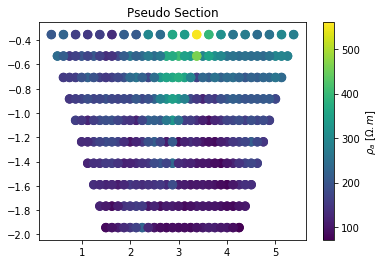

In [3]:
k.pseudo()

If we take a look at the electrodes position by plotting `R2.elec` we can see that there is no topography yet (all the values in the second column (=y) are 0.0, we don't take the 3rd column because it's a 2D survey here).

In [4]:
k.elec

array([[0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.  ],
       [0.5 , 0.  , 0.  ],
       [0.75, 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.25, 0.  , 0.  ],
       [1.5 , 0.  , 0.  ],
       [1.75, 0.  , 0.  ],
       [2.  , 0.  , 0.  ],
       [2.25, 0.  , 0.  ],
       [2.5 , 0.  , 0.  ],
       [2.75, 0.  , 0.  ],
       [3.  , 0.  , 0.  ],
       [3.25, 0.  , 0.  ],
       [3.5 , 0.  , 0.  ],
       [3.75, 0.  , 0.  ],
       [4.  , 0.  , 0.  ],
       [4.25, 0.  , 0.  ],
       [4.5 , 0.  , 0.  ],
       [4.75, 0.  , 0.  ],
       [5.  , 0.  , 0.  ],
       [5.25, 0.  , 0.  ],
       [5.5 , 0.  , 0.  ],
       [5.75, 0.  , 0.  ]])

Then we can load a csv file that will add topography for each electrode. The csv file should be of the form X,Y,Z and no headers are needed.

In [9]:
x = np.genfromtxt(os.path.join(testdir, 'elecTopo.csv'), delimiter=',')
print(x)

[[ 0.     0.    29.499]
 [ 0.25   0.    29.504]
 [ 0.5    0.    29.509]
 [ 0.75   0.    29.516]
 [ 1.     0.    29.478]
 [ 1.25   0.    29.461]
 [ 1.5    0.    29.454]
 [ 1.75   0.    29.428]
 [ 2.     0.    29.416]
 [ 2.25   0.    29.411]
 [ 2.5    0.    29.398]
 [ 2.75   0.    29.362]
 [ 3.     0.    29.329]
 [ 3.25   0.    29.245]
 [ 3.5    0.    29.159]
 [ 3.75   0.    29.083]
 [ 4.     0.    29.01 ]
 [ 4.25   0.    28.929]
 [ 4.5    0.    28.872]
 [ 4.75   0.    28.761]
 [ 5.     0.    28.672]
 [ 5.25   0.    28.593]
 [ 5.5    0.    28.509]
 [ 5.75   0.    28.412]]


and replace `R2.elec`.

In [10]:
k.elec = x

We can now create a mesh either triangular or rectangular.

computed DOI : 26.58
trian
Generating gmsh input file...

doi in gmshWrap.py: -2.937333
adding surface points and electrodes to input file...
probing for boundaries and other additions to the mesh
0 polygons added to input file
0 boundary(ies) added to input file
writing .geo to file completed, save location:
/media/jkl/data/phd/tmp/pyr2/src/api/invdir

Info    : Running 'Z:\media\jkl\data\phd\tmp\pyr2\src\api\exe\gmsh.exe mesh.geo -2' [Gmsh 3.0.6, 1 node, max. 1 thread]
Info    : Started on Tue Jan 08 17:49:52 2019
Info    : Reading 'mesh.geo'...
Info    : Done reading 'mesh.geo'
Info    : Finalized high order topology of periodic connections
Info    : Meshing 1D...
Info    : Meshing curve 1 (Line)
Info    : Meshing curve 2 (Line)
Info    : Meshing curve 3 (Line)
Info    : Meshing curve 4 (Line)
Info    : Meshing curve 5 (Line)
Info    : Meshing curve 6 (Line)
Info    : Meshing curve 7 (Line)
Info    : Meshing curve 8 (Line)
Info    : Meshing curve 9 (Line)
Info    : Meshing curve 10 

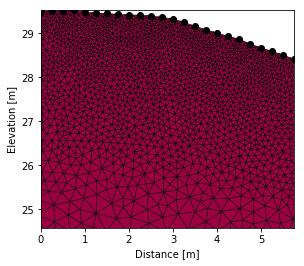

In [11]:
k.createMesh(typ='trian')
k.showMesh()

We can finally invert the data on this mesh. Note that it might take a while so be patient.

Writing .in file and protocol.dat ...
written mesh.dat file to 
/media/jkl/data/phd/tmp/pyr2/src/api/invdir/mesh.dat
done

-------- Main inversion ---------------



 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v3.2 <<

 >> D a t e : 08 - 01 - 2019
 >> My beautiful survey
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat
 >> R e g u l a r i s e d   T y p e <<
 >>   L i n e a r    F i l t e r    <<
 >> L o g - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o n <<
 >> D a t a   w e i g h t s   w i l l   b e  m o d i f i e d <<


 Processing dataset   1


 Measurements read:   299     Measurements rejected:     1
   Geometric mean of apparent resistivities:  0.34053E+03

 >> Total Memory required is:          0.145 Gb

   Iteration   1
     Initial RMS Misfit:        31.

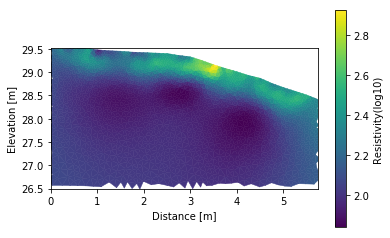

In [12]:
k.invert(iplot=True)

no sensitivities in mesh object to plot
no electrodes in mesh object to plot
Mesh plotted in 0.04812 seconds


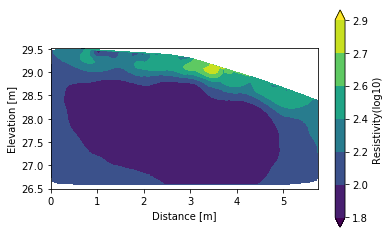

In [13]:
k.showResults(contour=True) # with contour

# In a nutshell

Working directory is: /media/jkl/data/phd/tmp/pyr2/src/api/invdir
clearing the dirname
36/636 reciprocal measurements NOT found.
3 measurements error > 20 %
Create Rectangular mesh...
computed DOI : 26.58
Using a quadrilateral mesh.
quad
written mesh.dat file to 
/media/jkl/data/phd/tmp/pyr2/src/api/invdir/mesh.dat
done

Writing .in file and protocol.dat ...
written mesh.dat file to 
/media/jkl/data/phd/tmp/pyr2/src/api/invdir/mesh.dat
done

-------- Main inversion ---------------



 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v3.2 <<

 >> D a t e : 08 - 01 - 2019
 >> My beautiful survey
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat
 >> R e g u l a r i s e d   T y p e <<
 >>   L i n e a r    F i l t e r    <<
 >> L o g - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a

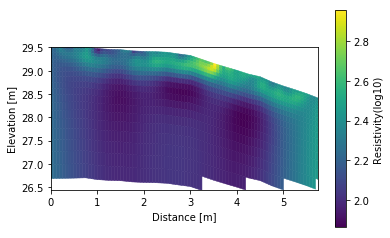

In [14]:
k = R2()
k.createSurvey('../src/api/test/syscalFileTopo.csv')
k.elec = np.genfromtxt('../src/api/test/elecTopo.csv', delimiter=',')
k.invert(iplot=True)